In [11]:
pip install gower

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from gower import gower_matrix
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#printing out data types of all the columns in dataframe
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [15]:

#encoding the all numeric column "TotalCharge" from categorical data into numeric data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

#calculation the number of missing values
df.isnull().sum()

#dropping the records with missing values
print("number of rows and columns before dropping records:",df.shape)
df1=df.dropna(inplace = False)
print("number of rows and columns after dropping records:",df1.shape)

#encoding yes to 0 and no to 1 in the churn column (Target column)
df1['Churn'].replace(to_replace='Yes', value=0, inplace=True)
df1['Churn'].replace(to_replace='No',  value=1, inplace=True)

#dropping the customerID column
df2 = df1.drop('customerID', axis=1)

#creating dummies of the categorical data columns
print("number of rows and columns before creating dummies:",df2.shape)
df_final = pd.get_dummies(df2)
print("number of rows and columns after creating dummies:",df_final.shape)

X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

print("number of rows and columns in X:" ,X.shape)
print("number of rows and columns in y:" ,y.shape)

number of rows and columns before dropping records: (7043, 21)
number of rows and columns after dropping records: (7032, 21)
number of rows and columns before creating dummies: (7032, 20)
number of rows and columns after creating dummies: (7032, 46)
number of rows and columns in X: (7032, 45)
number of rows and columns in y: (7032,)


<ipython-input-15-5da2b695ba74>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Churn'].replace(to_replace='Yes', value=0, inplace=True)
<ipython-input-15-5da2b695ba74>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Churn'].replace(to_replace='No',  value=1, inplace=True)


In [16]:
pip install gower

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then split the temporary set into validation (20%) and testing (20%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set: ",X_train.shape,y_train.shape)
print("Val set: ",X_val.shape,y_val.shape)
print("Test set: ",X_test.shape,y_test.shape)

Training set:  (4219, 45) (4219,)
Val set:  (1406, 45) (1406,)
Test set:  (1407, 45) (1407,)


In [18]:
from sklearn.metrics import recall_score
from gower import gower_matrix
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then split the temporary set into validation (20%) and testing (20%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print("Training set: ",X_train.shape,y_train.shape)
print("Val set: ",X_val.shape,y_val.shape)
print("Test set: ",X_test.shape,y_test.shape)

k_values = list(range(1, int(np.sqrt(len(X_train)))))
#k_values=list(range(1,10))
best_accuracy=0.75
best_k=None
best_recall_1=0.6
k_list=[]
accuracy_list=[]
recall_list=[]

gower_dist_matrix_train = gower_matrix(X_train)
gower_dist_matrix_val = gower_matrix(X_val, X_train)
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    knn_model.fit(gower_dist_matrix_train, y_train)
    y_pred = knn_model.predict(gower_dist_matrix_val)

    accuracy = accuracy_score(y_val, y_pred)
    recall_1 = recall_score(y_val, y_pred, pos_label=0)
    k_list.append(k)
    accuracy_list.append(accuracy)
    recall_list.append(recall_1)
    #print("k, Accuracy {'k'}, recall {'k'} :", k,accuracy,recall_1)
    if recall_1 > best_recall_1 and accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_recall_1 = recall_1
        conf_matrix = confusion_matrix(y_val, y_pred)
        # Evaluate the KNN model

print("Best k:", best_k)
print("Accuracy with Best k:", best_accuracy)
print("recall with Best k:", best_recall_1)


conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Training set:  (4219, 45) (4219,)
Val set:  (1406, 45) (1406,)
Test set:  (1407, 45) (1407,)
Best k: 8
Accuracy with Best k: 0.7652916073968705
recall with Best k: 0.6263440860215054
Confusion Matrix:
 [[209 163]
 [142 892]]


(1406, 4219)
------------------------------------------------------------
Train Set
Accuracy: 0.8122777909457217
recall with Best k: 0.707488986784141

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1135
           1       0.89      0.85      0.87      3084

    accuracy                           0.81      4219
   macro avg       0.76      0.78      0.77      4219
weighted avg       0.82      0.81      0.82      4219

Confusion Matrix:
 [[ 803  332]
 [ 460 2624]]
------------------------------------------------------------
------------------------------------------------------------
Validate Set
Accuracy: 0.7652916073968705
recall with Best k: 0.6263440860215054

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       372
           1       0.86      0.82      0.84      1034

    accuracy                           0.77      1406
   macr

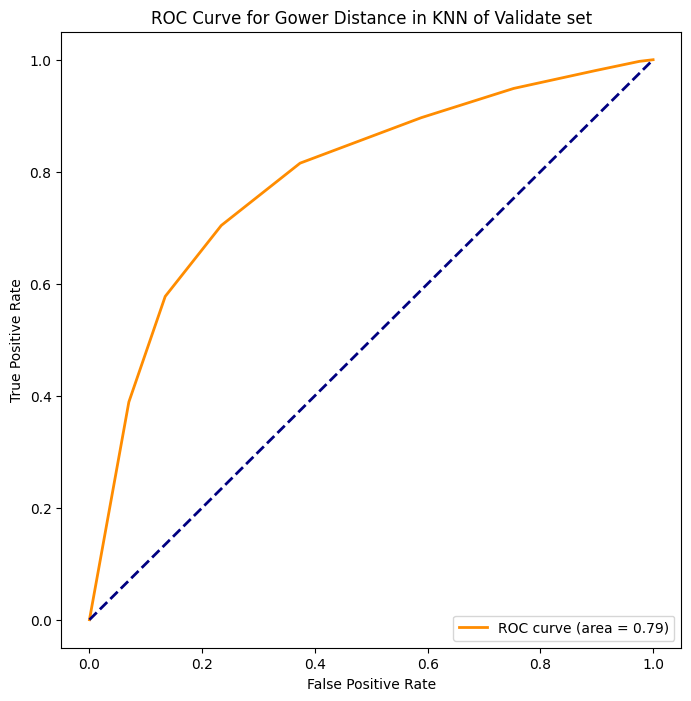

In [19]:


gower_dist_matrix_train = gower_matrix(X_train)
gower_dist_matrix_val = gower_matrix(X_val, X_train)
print(gower_dist_matrix_val.shape)
gower_dist_matrix_trainpred = gower_matrix(X_train, X_train)
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric='precomputed')

# Train the KNN model
knn_model.fit(gower_dist_matrix_train, y_train)

print("-"*60)
print("Train Set")
y_pred_train = knn_model.predict(gower_dist_matrix_trainpred)
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_0_train = recall_score(y_train, y_pred_train, pos_label=0)
print("Accuracy:",accuracy_train)
print("recall with Best k:", recall_0_train)
print("\nClassification Report:")

print(classification_report(y_train, y_pred_train))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", conf_matrix_train)
print("-"*60)

print("-"*60)
print("Validate Set")
y_pred_val = knn_model.predict(gower_dist_matrix_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
recall_0_val = recall_score(y_val, y_pred_val, pos_label=0)
print("Accuracy:",accuracy_val)
print("recall with Best k:", recall_0_val)
print("\nClassification Report:")

print(classification_report(y_val, y_pred_val))
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:\n", conf_matrix_val)
print("-"*60)



y_probs = knn_model.predict_proba(gower_dist_matrix_val)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gower Distance in KNN of Validate set')
plt.legend(loc="lower right")
plt.show()

(4219, 4219)
(1406, 4219)
(4219, 4219)
------------------------------------------------------------
Train Set
Accuracy: 0.8122777909457217
recall with Best k: 0.707488986784141

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1135
           1       0.89      0.85      0.87      3084

    accuracy                           0.81      4219
   macro avg       0.76      0.78      0.77      4219
weighted avg       0.82      0.81      0.82      4219

Confusion Matrix:
 [[ 803  332]
 [ 460 2624]]
------------------------------------------------------------
------------------------------------------------------------
Validate Set
Accuracy: 0.7652916073968705
recall with Best k: 0.6263440860215054

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       372
           1       0.86      0.82      0.84      1034

    accuracy                       

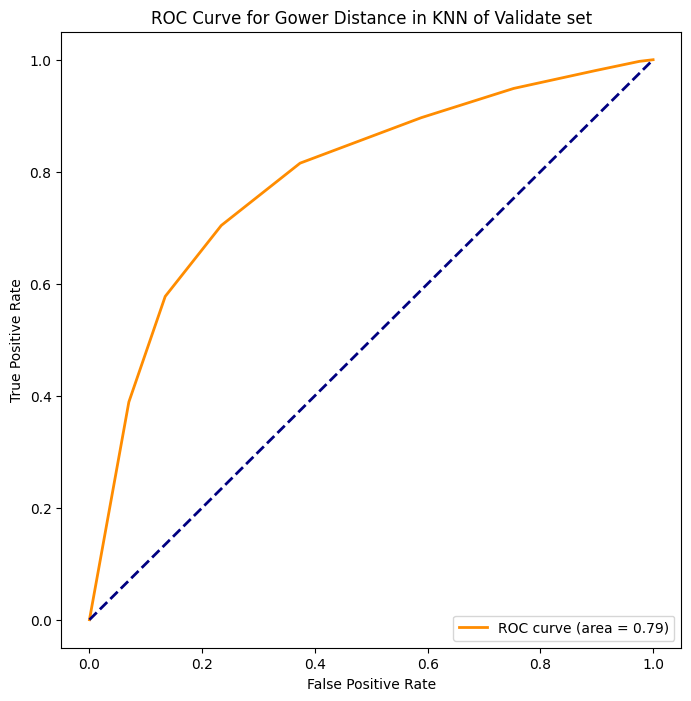

------------------------------------------------------------
------------------------------------------------------------
test Set
Accuracy: 0.7569296375266524
recall with Best k: 0.6408839779005525

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.64      0.58       362
           1       0.87      0.80      0.83      1045

    accuracy                           0.76      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.78      0.76      0.76      1407

Confusion Matrix:
 [[232 130]
 [212 833]]


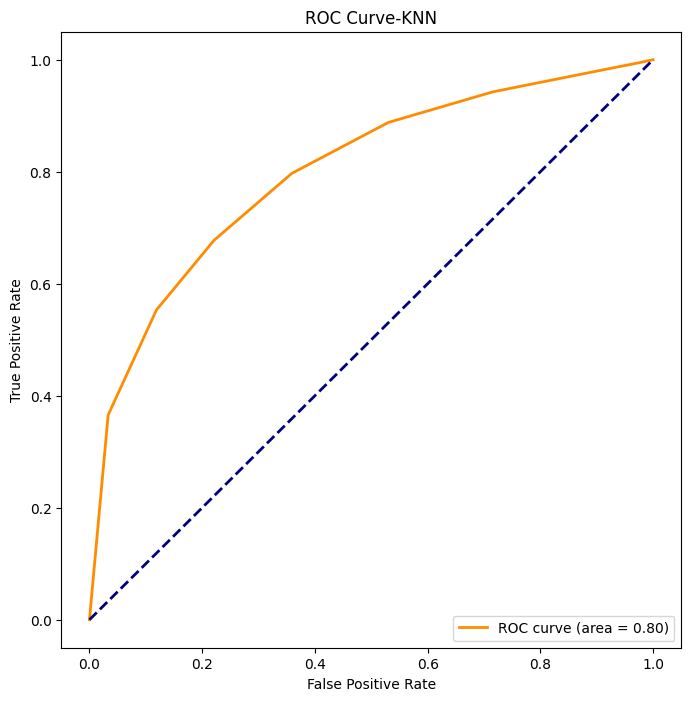

------------------------------------------------------------


In [21]:

gower_dist_matrix_train = gower_matrix(X_train)
print(gower_dist_matrix_train.shape)
gower_dist_matrix_val = gower_matrix(X_val, X_train)
print(gower_dist_matrix_val.shape)
gower_dist_matrix_test = gower_matrix(X_train, X_train)
print(gower_dist_matrix_test.shape)
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric='precomputed')

# Train the KNN model
knn_model.fit(gower_dist_matrix_train, y_train)

print("-"*60)
print("Train Set")
y_pred_train = knn_model.predict(gower_dist_matrix_trainpred)
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_0_train = recall_score(y_train, y_pred_train, pos_label=0)
print("Accuracy:",accuracy_train)
print("recall with Best k:", recall_0_train)
print("\nClassification Report:")

print(classification_report(y_train, y_pred_train))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", conf_matrix_train)
print("-"*60)

print("-"*60)
print("Validate Set")
y_pred_val = knn_model.predict(gower_dist_matrix_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
recall_0_val = recall_score(y_val, y_pred_val, pos_label=0)
print("Accuracy:",accuracy_val)
print("recall with Best k:", recall_0_val)
print("\nClassification Report:")

print(classification_report(y_val, y_pred_val))
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:\n", conf_matrix_val)

y_probs = knn_model.predict_proba(gower_dist_matrix_val)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gower Distance in KNN of Validate set')
plt.legend(loc="lower right")
plt.show()

print("-"*60)

gower_dist_matrix_test = gower_matrix(X_test, X_train)
print("-"*60)
print("test Set")
y_pred_test = knn_model.predict(gower_dist_matrix_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_0_test = recall_score(y_test, y_pred_test, pos_label=0)
print("Accuracy:",accuracy_test)
print("recall with Best k:", recall_0_test)
print("\nClassification Report:")

print(classification_report(y_test, y_pred_test))
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix_test)

y_probs = knn_model.predict_proba(gower_dist_matrix_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-KNN')
plt.legend(loc="lower right")
plt.show()
print("-"*60)


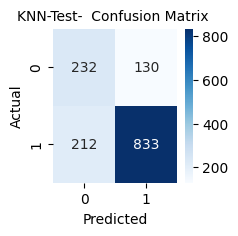

In [22]:
# Plot confusion matrix for test data
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})
plt.title('KNN-Test-  Confusion Matrix ',fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()